<a href="https://colab.research.google.com/github/luigiselmi/dl_tensorflow/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision
We have already seen the application of fully connected neural networks to the MNIST digits images classification task. In this notebook we use convolutional neural networks for the same task that provides several advantages over the fully connected layers. In Colab you may want to switch the Runtime to "T4 GPU" to save time during the training of the model.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time

## The MNIST digits classification task
We use the functional syntax to build our convolutional model. We use three convolutional layers, followed by a max pooling layer, then a flatten layer, that is a fully connected layer of one dimension with the same number of units as the size of the last convolutional layer. The flatten layer is used to reduce the output to one dimension. Finally we have a fully connected layer with a softmax activation function to provide the probability for each digit. As we can see from the model summary, the size of the model's features, i.e. width and heigh, shrinks while the number of channels, or feature maps, increases. The shape of the inputs is Height x Width x Channel, in the MNIST case 28 x 28 x 1.  

![ConvNet](https://github.com/luigiselmi/dl_tensorflow/blob/main/images/mnist_cnn.jpg?raw=1)

In [2]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

We reuse most of the code used for the MNIST digits classification in the notebook [Machine Learning Fundamentals](ml_fundamentals.ipynb) with the fully connected layers.

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

11490434/11490434 [==============================] - 0s 0us/step


We compile and fit the CNN model  

In [4]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 10s 6ms/step - loss: 0.1572 - accuracy: 0.9498
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0450 - accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0303 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0221 - accuracy: 0.9931
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0175 - accuracy: 0.9947


We perform an evaluation of the model's performances on the test set. We can see the our network with only three convolutional layers achieves a better performance than the fully connected model.

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0282 - accuracy: 0.9915
Test accuracy: 0.992


## The convolution operation
The difference between a dense layer and a convolutional layer is that a dense (fully connected) layer learns global patterns in an image, while a convolutional layer learns local patterns within small 2D windows that do not depend on their location in the image. In our convolutional layers we have used a window of size 3x3 pixels (kernel size). The advantages of using convolutional layers is that they learn patterns that are

* translational invariant
* hierarchically organized

An object can be learnt by the convolutional layer as made up of simpler objects such as circles and lines, wherever they appear in the same configuration. A convolutional layer is defined by its

* window (or kernel) size
* number of filters (or channels / feature maps)

The number of parameters to be learnt by a convolutional layer depends on the kernel size, the number of filters, and the way the kernel is moved over the input, that is the padding and the stride. Padding is used to add one or more rows and columns to the borders of the 2D input in order to have an output of the same size of the input. Stride is used to reduce the size of the output.

## The max-pooling operation
After a convolutional layer a max-pooling layer is used to halve the size of feature maps. There are no learning parameters for this type of layer sine it is a simple operation for which the maximum value of a 2x2 kernel with stride 2 is used to build the output. The main effect of max-pooling is to reduce the number of feature maps and therefore the number of parameters to learn.

## Number of learnable parameters of each convolutional layer
The number of parameters $p_l$ to learn by each convolutional layer $l$ is given by the product of the number of feauture maps of the previous layer $f_{l-1}$ (max-pooling) times the kernel size (eg. 3 x 3 = 9) times the number of output feature maps $f_l$ of the convolutional layer plus again the number of feature maps $f_l$:

$$p_l = f_{l-1} × k_l × k_l × f_l + f_l  $$

For instance, the number of parameters of the 2nd convolutional layer is

$$p_2 = f_1 × 3 × 3 × f_2 + f_2 = 32 × 3 × 3 \times 64 + 64 = 18496$$

The number of parameters of the 3rd convolutional layer is

$$p_3 = f_2 × 3 × 3 × f_3 + f_3 = 64 × 3 × 3 \times 128 + 128 = 73856$$

## Training a ConvNet on a small dataset
We train a convolutional neural network model (CNN) for an image classification task. The images are about dogs and cats. We download the data from Kaggle. In order to use the Kaggle APIs we need to import a token previously downloaded after we login into the Kaggle web site.

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lselmi","key":"c8a6ca5d3e0efc3c981490a3cbb4bb98"}'}

We move the file with the token to the /root/.kaggle/ folder

In [10]:
mv /content/kaggle.json /root/.kaggle/

We call the Kaggle APIs to download the dataset

In [11]:
!kaggle competitions download -c dogs-vs-cats

 98% 792M/812M [00:09<00:00, 232MB/s]
100% 812M/812M [00:09<00:00, 91.4MB/s]


We uncompress the data

In [12]:
!unzip -qq /content/dogs-vs-cats.zip

In [13]:
!unzip -qq /content/train.zip

The train dataset contains 12500 images of dogs and 12500 of cats

In [14]:
!find /content/train/ -type f | grep cat |wc -l

12500


In [15]:
!find /content/train/ -type f | grep dog |wc -l

12500


In [16]:
from PIL import Image
img_cat = Image.open('/content/train/cat.0.jpg')
img_cat.size

(500, 374)

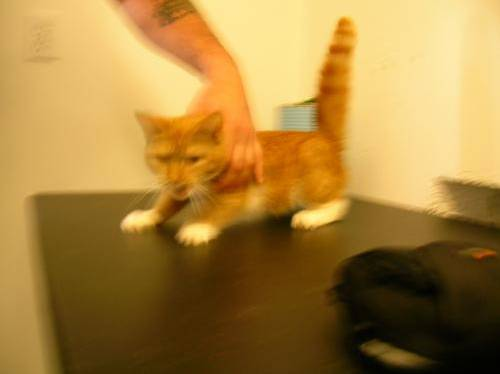

In [17]:
img_cat

In [18]:
img_dog = Image.open('/content/train/dog.0.jpg')
img_dog.size

(499, 375)

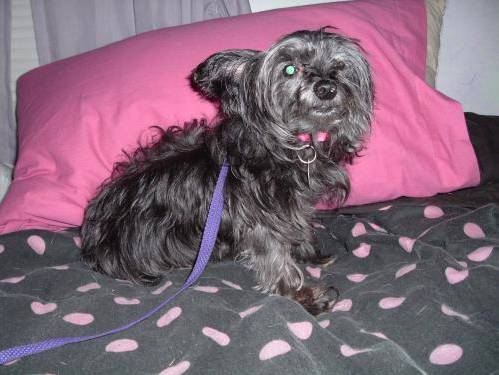

In [19]:
img_dog

We will use only 1000 images of dogs and 1000 images of cats for training, 500 images of each class for validation, and 1000 images of each class for testing.  

In [20]:
import os, shutil, pathlib
original_dir = pathlib.Path("/content/train/")
new_base_dir = pathlib.Path("/content/cats_vs_dogs_small")

In [21]:
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg"
            for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

In [22]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

For this task we use a model with 5 convolutional layers. Since we are dealing with a binary classification task, the output layer contains only one unit with a sigmoid activation function. We rescale the value of the image pixels from a [0, 255] range to a [0, 1] range. As we can see from the model summary, the size of each feature map goes from 180x180 of the initial 3 RGB channes, to 7x7 of the last layer, while the number of feature maps (filters) goes from the three RGB channels of the input layer to 256 of the last convolutional layer.

In [23]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [24]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

## Data preprocessing
As we have seen the images have different size that we have to resize to the height and width of the input layer, e.g. 180x180. We have also to transform the values to floating-point numbers

* Convert the images into floating-point tensors
* Resize them to a shared size (e.g. 180 × 180)
* Pack them into batches (e.g. batches of 32 images)

We create three datasets from the files, using an utility function provided by Keras, for training, validation and test. A dataset is an iterator that can be used to:

* loop the images
* create batches
* shuffle the images
* apply transformations to the images



In [25]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(new_base_dir / "train", image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / "validation", image_size=(180, 180), batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / "test", image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


Each dataset contains batches of tensors created by loading the data in the images after they have been resized.

In [26]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


We set the callbacks for the model's fit(.) function to save the best model during the training and the validation

In [27]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras", save_best_only=True, monitor="val_loss")]

We can finally fit(.) the model to the data

In [28]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 16s 184ms/step - loss: 0.7086 - accuracy: 0.5215 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6885 - accuracy: 0.5460 - val_loss: 0.6902 - val_accuracy: 0.5030
Epoch 3/30
63/63 [==============================] - 6s 93ms/step - loss: 0.6784 - accuracy: 0.5790 - val_loss: 0.6472 - val_accuracy: 0.6680
Epoch 4/30
63/63 [==============================] - 4s 59ms/step - loss: 0.6458 - accuracy: 0.6330 - val_loss: 0.6756 - val_accuracy: 0.5890
Epoch 5/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6197 - accuracy: 0.6585 - val_loss: 0.5910 - val_accuracy: 0.6800
Epoch 6/30
63/63 [==============================] - 7s 96ms/step - loss: 0.5893 - accuracy: 0.6880 - val_loss: 0.5912 - val_accuracy: 0.6810
Epoch 7/30
63/63 [==============================] - 4s 62ms/step - loss: 0.5779 - accuracy: 0.6950 - val_loss: 0.6309 - val_accuracy: 0.6490
Epoch 8/30


We plot the evaluation performances: accuracy and loss on the training and validation datasets. The plots show a clear sign of overfitting: the training accuracy achieves almost 100% while the validation accuracy stalls at around 70%.

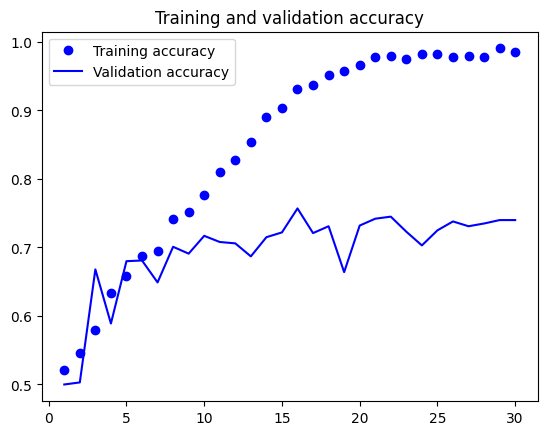

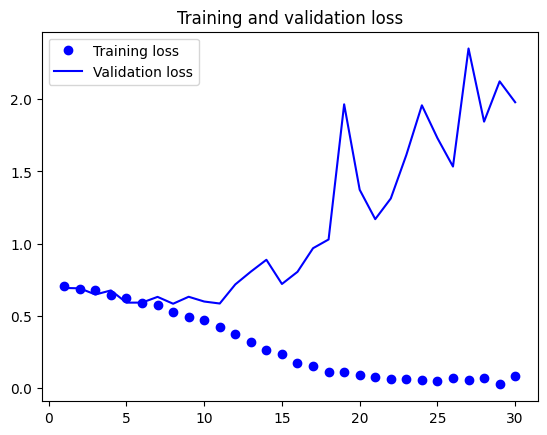

In [29]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

We use the model with the test set to see its performances against unseen data

In [30]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 31ms/step - loss: 0.5698 - accuracy: 0.7145
Test accuracy: 0.715
